## Exercise 5.6
### 1. Customizing your pandas import

The `pandas` package is also great at dealing with many of the issues you will encounter when importing data as a data scientist, such as comments occurring in flat files, empty lines and missing values. In this exercise, you're going to import a slightly corrupted copy of the Titanic dataset `titanic_corrupt.txt`, which is tab-delimited.

#### Instructions

- Run the cell below to see the result of importing the file without customization. Do you see the problems?

In [1]:
import pandas as pd
# Assign filename: file
file = 'https://github.com/huangpen77/BUDT704/raw/main/Chapter06/titanic_corrupt.txt'
# Import file: data
data = pd.read_csv(file)
# Print the head of the DataFrame
print(data.head(10))

#no column headers, data representation incovenient

  PassengerId\tSurvived\tPclass\tSex\tAge\tSibSp\tParch\tTicket\tFare\tCabin\tEmbarked
0  1\t0\t3\tmale\t22.0\t1\t0\tA/5 21171\t7.25\tB2...                                  
1  2\t1\t1\tfemale\t38.0\t1\t0\tPC 17599\t71.2833...                                  
2  3\t1\t3\tfemale\t26.0\t0\t0\tSTON/O2. 3101282\...                                  
3  4\t1\t1\tfemale\t35.0\t1\t0\t113803\t53.1\tC12...                                  
4    5\t0\t3\tmale\t35.0\t0\t0\t373450\t8.05\tD55\tS                                  
5  6\t0\t3\tmale\t-1\t0\t0\t330877\t8.4583\tUnkno...                                  
6  7\t0\t1\tmale\t54.0\t0\t0\t17463\t51.8625\tE46\tS                                  
7   8\t0\t3\tmale\t2.0\t3\t1\t349909\t21.075\tA32\tS                                  
8  9\t1\t3\tfemale\t27.0\t0\t2\t347742\t11.1333\t...                                  
9  10\t1\t2\tfemale\t14.0\t1\t0\t237736\t30.0708\...                                  


#### Instructions (1 point)

- Complete the `sep` argument of `pd.read_csv()` so that tab is used as delimiter. Tab is represented as `'\t'` in Python.

In [2]:
# Import file: data, specify the delimiter as tab 
data = pd.read_csv(file, sep='\t')
# Print the head of the DataFrame
print(data.head(10))

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   
5            6         0       3    male  -1.0      0      0   
6            7         0       1    male  54.0      0      0   
7            8         0       3    male   2.0      3      1   
8            9         1       3  female  27.0      0      2   
9           10         1       2  female  14.0      1      0   

             Ticket     Fare    Cabin Embarked  
0         A/5 21171   7.2500      B26        S  
1          PC 17599  71.2833      C85        C  
2  STON/O2. 3101282   7.9250      C34        S  
3            113803  53.1000     C123        S  
4            373450   8.0500      D55        S  
5

#### Instructions (1 point)

- Complete the `index_col` argument of `pd.read_csv()` so that `PassengerId` is used as index.

In [5]:
# Import file: data, specify the index column as 'PassengerID'
data = pd.read_csv(file, sep='\t', index_col='PassengerId')
# Print the head of the DataFrame
print(data.head(10))

             Survived  Pclass     Sex   Age  SibSp  Parch            Ticket  \
PassengerId                                                                   
1                   0       3    male  22.0      1      0         A/5 21171   
2                   1       1  female  38.0      1      0          PC 17599   
3                   1       3  female  26.0      0      0  STON/O2. 3101282   
4                   1       1  female  35.0      1      0            113803   
5                   0       3    male  35.0      0      0            373450   
6                   0       3    male  -1.0      0      0            330877   
7                   0       1    male  54.0      0      0             17463   
8                   0       3    male   2.0      3      1            349909   
9                   1       3  female  27.0      0      2            347742   
10                  1       2  female  14.0      1      0            237736   

                Fare    Cabin Embarked  
PassengerI

#### Instructions (2 points)
You may have noticed that the column `Cabin` has values `'Unknown'` in some rows. In addition, column `Age` has value `-1` in some rows. They represent missing values.

- Complete the `na_values` arguments of `pd.read_csv()` so that `'Unknown'` will be treated as missing value for column `Cabin`, and `-1` will be treated as missing value for column `Age`. Using a dictionary as the argument.

In [15]:
# Import file: data, specify 'Nothing' as the null value
data = pd.read_csv(file, sep='\t', index_col='PassengerId', na_values={'Cabin':['Unknown'], 'Age':['-1']})

# Print the head of the DataFrame
print(data.head(10))

             Survived  Pclass     Sex   Age  SibSp  Parch            Ticket  \
PassengerId                                                                   
1                   0       3    male  22.0      1      0         A/5 21171   
2                   1       1  female  38.0      1      0          PC 17599   
3                   1       3  female  26.0      0      0  STON/O2. 3101282   
4                   1       1  female  35.0      1      0            113803   
5                   0       3    male  35.0      0      0            373450   
6                   0       3    male   NaN      0      0            330877   
7                   0       1    male  54.0      0      0             17463   
8                   0       3    male   2.0      3      1            349909   
9                   1       3  female  27.0      0      2            347742   
10                  1       2  female  14.0      1      0            237736   

                Fare Cabin Embarked  
PassengerId  

## Exercise 5.7
### 1. pandas line plots

The ```.plot()``` method will place the Index values on the x-axis by default. In this exercise, you'll practice making line plots with specific columns on the x and y axes.

You will work with a dataset consisting of monthly stock prices in 2015 for AAPL, GOOG, and IBM. The stock prices were obtained from [Yahoo Finance](#http://finance.yahoo.com/```). Your job is to plot the 'Month' column on the x-axis and the AAPL and IBM prices on the y-axis using a list of column names.

All necessary modules have been imported for you, and the DataFrame is available in the workspace as df. Explore it using methods such as ```.head()```, ```.info()```, and ```.describe()``` to see the column names.
#### Instructions 

* Run the following cell to see the dataset

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

values = {'Jan': [117.160004, 534.5224450000002, 153.309998],
          'Feb': [128.46000700000002, 558.402511, 161.940002],
          'Mar': [124.43, 548.002468, 160.5],
          'Apr': [125.150002, 537.340027, 171.28999299999995],
          'May': [130.279999, 532.1099849999998, 169.649994],
          'Jun': [125.43, 520.51001, 162.660004],
          'Jul': [121.300003, 625.6099849999998, 161.990005],
          'Aug': [112.760002, 618.25, 147.889999],
          'Sep': [110.300003, 608.419983, 144.970001],
          'Oct': [119.5, 710.8099980000002, 140.080002],
          'Nov': [118.300003, 742.599976, 139.419998],
          'Dec': [105.260002, 758.880005, 137.619995]}

stocks_df = pd.DataFrame.from_dict(values, orient='index')
cols = ['AAPL', 'GOOG', 'IBM']
stocks_df.columns = cols
print(stocks_df.head(), '\n')
print(stocks_df.info())

           AAPL        GOOG         IBM
Jan  117.160004  534.522445  153.309998
Feb  128.460007  558.402511  161.940002
Mar  124.430000  548.002468  160.500000
Apr  125.150002  537.340027  171.289993
May  130.279999  532.109985  169.649994 

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Jan to Dec
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    12 non-null     float64
 1   GOOG    12 non-null     float64
 2   IBM     12 non-null     float64
dtypes: float64(3)
memory usage: 384.0+ bytes
None


#### Instructions (3 points)

* Create a list of y-axis column names called `y_columns` consisting of `'AAPL'` and `'IBM'`.
* Generate a line plot with `y=y_columns` as inputs. We are using the index as x values, so use option `use_index=True` in the `plot()` method
* Give the plot a title of `'Monthly stock prices'`.
* Specify the y-axis label as `'Price ($US)'`.
* Display the plot.

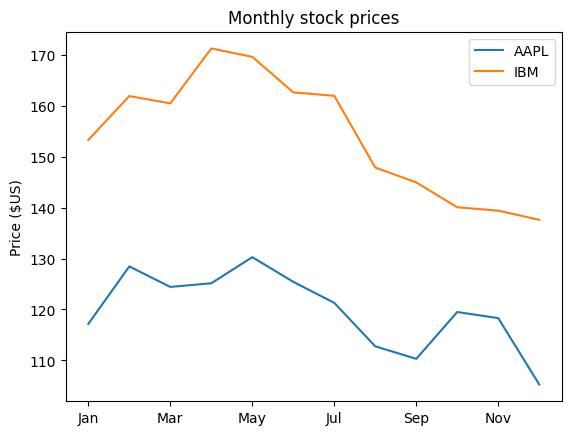

In [17]:
# Create a list of y-axis column names: y_columns consisting of 'AAPL' and 'IBM'
y_columns = ['AAPL', 'IBM']

# Generate a line plot. We are using the index as x values, so use option 'use_index=True' in the plot() method
stocks_df.plot(y=y_columns, use_index=True)

# Add the title 'Monthly stock prices'
plt.title('Monthly stock prices')

# Add the y-axis label 'Price ($US)'
plt.ylabel('Price ($US)')

# Display the plot
plt.show()

### 2. pandas scatter plots

Pandas scatter plots are generated using the ```kind='scatter'``` keyword argument. Scatter plots require that the x and y columns be chosen by specifying the ```x``` and ```y``` parameters inside ```.plot()```. Scatter plots can also take an ```s``` keyword argument to provide the radius of each circle to plot in pixels.

In this exercise, you're going to plot fuel efficiency (miles-per-gallon) versus horse-power for 392 automobiles manufactured from 1970 to 1982 from the [UCI Machine Learning Repository](#https://archive.ics.uci.edu/ml/datasets/Auto+MPG).

All necessary modules have been imported and the DataFrame is available in the workspace as `auto_df`.

### Instructions

* run the following cell to see the dataset

In [18]:
data_file = 'https://github.com/huangpen77/BUDT704/raw/main/Chapter06/auto-mpg.csv'
auto_df = pd.read_csv(data_file)
print(auto_df.head(), '\n')
print(auto_df.info(), '\n')

    mpg  cyl  displ   hp  weight  accel  yr origin                       name
0  18.0    8  307.0  130    3504   12.0  70     US  chevrolet chevelle malibu
1  15.0    8  350.0  165    3693   11.5  70     US          buick skylark 320
2  18.0    8  318.0  150    3436   11.0  70     US         plymouth satellite
3  16.0    8  304.0  150    3433   12.0  70     US              amc rebel sst
4  17.0    8  302.0  140    3449   10.5  70     US                ford torino 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   cyl     392 non-null    int64  
 2   displ   392 non-null    float64
 3   hp      392 non-null    int64  
 4   weight  392 non-null    int64  
 5   accel   392 non-null    float64
 6   yr      392 non-null    int64  
 7   origin  392 non-null    object 
 8   name    392 non-null    object 
dtypes: float64(3),

### Instructions (3 points)

* Generate a scatter plot with `'hp'` on the x-axis and `'mpg'` on the y-axis.
* Add a title to the plot.
* Specify the x-axis and y-axis labels.

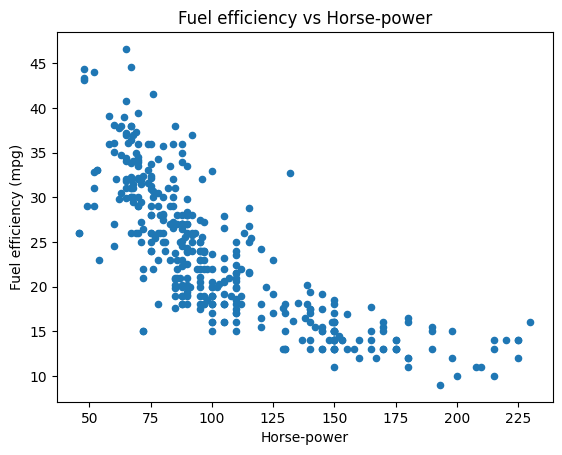

In [19]:

import matplotlib.pyplot as plt

# Generate a scatter plot with 'hp'on the x-axis and 'mpg' on the y-axis. 
auto_df.plot(kind='scatter', x='hp', y='mpg')

# Add the title 'Fuel efficiency vs Horse-power'
plt.title('Fuel efficiency vs Horse-power')

# Add the x-axis label
plt.xlabel('Horse-power')

# Add the y-axis label
plt.ylabel('Fuel efficiency (mpg)')

# Display the plot
plt.show()

### 3 pandas box plots

While pandas can plot multiple columns of data in a single figure, making plots that share the same x and y axes, there are cases where two columns cannot be plotted together because their units do not match. The ```.plot()``` method can generate subplots for each column being plotted. Here, each plot will be scaled independently.

In this exercise your job is to generate box plots for `fuel efficiency (mpg)` and `weight` from the automobiles data set. To do this in a single figure, you'll specify ```subplots=True``` inside ```.plot()``` to generate two separate plots.

All necessary modules have been imported and the automobiles dataset is available in the workspace as ```auto_df```.

#### Instructions (2 points)

* Make a list called `cols` of the column names to be plotted: `'weight'` and `'mpg'`.
* Call plot on `auto_df[cols]` to generate a box plot of the two columns in a single figure. To do this, specify `subplots=True`.

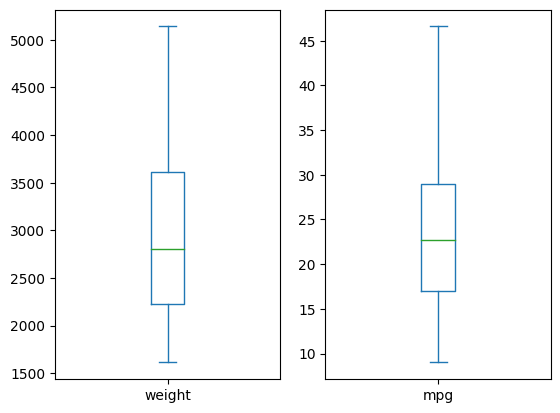

In [20]:
# Make a list of the column names to be plotted: cols
cols = ['weight', 'mpg']

# Generate the box plots, specify 'subplots=True'
auto_df[cols].plot(kind='box', subplots=True)

# Display the plot
plt.show()

## Exercise 5.8
### 1. Bachelor's degrees awarded to women
In this exercise, you will investigate statistics of the percentage of Bachelor's degrees awarded to women from 1970 to 2011. Data is recorded every year for 17 different fields. This data set was obtained from the [Digest of Education Statistics](http://nces.ed.gov/programs/digest/2013menu_tables.asp).

Your job is to compute the minimum and maximum values of the ```'Engineering'``` column and generate a line plot of the mean value of all 17 academic fields per year. To perform this step, you'll use the ```.mean()``` method with the keyword argument ```axis='columns'```. This computes the mean across all columns per row.

The DataFrame has been pre-loaded for you as ```df``` with the index set to ```'Year'```.

In [4]:
import pandas as pd
data_file = 'https://github.com/huangpen77/BUDT704/raw/main/Chapter06/percent-bachelors-degrees-women-usa.csv'
df = pd.read_csv(data_file, index_col='Year')
df.head()

,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
Year,,,,,,,,,,,,,,,,,
1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


#### Instructions (4 points)

* Print the minimum value of the `'Engineering'` column. Note: `df.Engineering` and `df['Engineering']` are equivalent.
* Print the maximum value of the `'Engineering'` column.
* Construct the mean percentage of each column `.mean()`, and sort the result in ascending order.
* Construct the mean percentage per year with `.mean(axis=1)`. Assign the result to `yearly_mean`.

In [22]:
# Print the minimum value of the Engineering column. Note: df.Engineering and df['Engineering'] are equivalent.
df.Engineering.min()

0.8

In [23]:
# Print the maximum value of the Engineering column
df.Engineering.max()

19.0

In [28]:
# Construct the mean percentage of each column, and sort the result in ascending order.
df.mean(axis='columns')

Year
1970    38.594697
1971    38.603481
1972    39.066075
1973    40.131826
1974    41.715916
1975    42.373672
1976    44.015581
1977    45.673823
1978    47.308670
1979    48.811798
1980    49.980583
1981    50.974090
1982    52.009448
1983    52.187399
1984    52.474007
1985    52.399548
1986    52.752830
1987    53.169798
1988    53.130635
1989    53.305542
1990    53.737364
1991    53.471622
1992    53.262399
1993    53.199202
1994    53.238427
1995    53.508401
1996    53.941559
1997    54.446953
1998    55.227195
1999    55.971538
2000    56.501939
2001    56.946913
2002    57.181722
2003    57.367542
2004    57.019094
2005    56.723782
2006    56.262194
2007    56.053781
2008    55.903924
2009    56.026406
2010    55.883043
2011    55.999587
dtype: float64

In [30]:
# Construct the mean percentage per year: yearly_mean
yearly_mean = df.mean(axis=1)
yearly_mean.head()

Year
1970    38.594697
1971    38.603481
1972    39.066075
1973    40.131826
1974    41.715916
dtype: float64

### 2. Titanic ticket fare

In many data sets, there can be large differences in the mean and median value due to the presence of outliers.

In this exercise, you'll investigate the mean, median, and max fare prices paid by passengers on the Titanic and generate a box plot of the fare prices. This data set was obtained from [Vanderbilt University](#http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html).

All necessary modules have been imported and the DataFrame is available in the workspace as ```df```.

#### Instructions (2 points)

* Print summary statistics of the `fare` column of `df` with `.describe()` and `print()`. Note: `df.fare` and `df['fare']` are equivalent.
* Generate a box plot of the `fare` column.

In [5]:
data_file = 'https://github.com/huangpen77/BUDT704/raw/main/Chapter06/titanic.csv'
df = pd.read_csv(data_file)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
# Print summary statistics of the 'fare' column of df with .describe().
print(df.fare.describe())

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64


<AxesSubplot: >

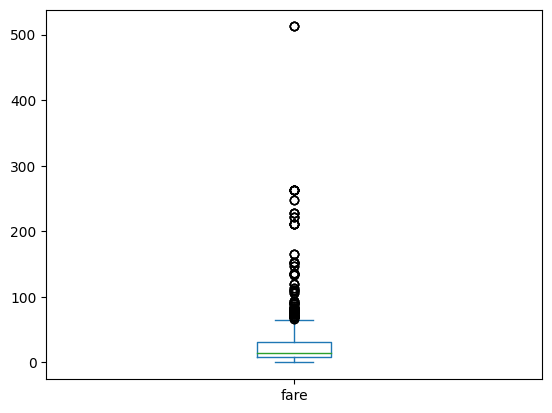

In [9]:
# Generate a box plot of the 'fare'column.
df.fare.plot(kind='box')

### 3. Standard deviation of temperature

Let's use the mean and standard deviation to explore differences in temperature distributions in Pittsburgh in 2013. The data has been obtained from [Weather Underground](#https://www.wunderground.com/history/).

In this exercise, you're going to compare the distribution of daily temperatures in January and March. You'll compute the mean and standard deviation for these two months. You will notice that while the mean values are similar, the standard deviations are quite different, meaning that one month had a larger fluctuation in temperature than the other.

The DataFrames have been pre-loaded for you as ```january```, which contains the January data.

#### Instructions (2 points)

* Compute and print the means of the January data using the `.mean()` method.
* Compute and print the standard deviations of the January data using the `.std()` method.

In [11]:
january = pd.read_csv('https://github.com/huangpen77/BUDT704/raw/main/Chapter06/january.csv')
january.head()

,Date,Temperature
0,2013-01-01,28
1,2013-01-02,21
2,2013-01-03,24
3,2013-01-04,28
4,2013-01-05,30


In [12]:
# Print the mean of the January data
january.Temperature.mean()

32.354838709677416

In [13]:
# Print the standard deviation of the January data
january.Temperature.std()

13.583196450263523